In [1]:
%matplotlib inline

In [2]:
# Imports
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('almbrand')
seed = 42
np.random.seed(seed)

In [3]:
# Courtesy of https://www.kaggle.com/mhdzahier/travel-insurance
df = pd.read_csv('data/travel insurance.csv')

In [4]:
# Examine data
df.sample(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
46375,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,63,CAMBODIA,30.00,0.00,NaN,36
28679,EPX,Travel Agency,Online,Cancellation Plan,No,73,UNITED STATES,19.00,0.00,NaN,68
34639,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,56,PHILIPPINES,67.00,0.00,NaN,36
48769,EPX,Travel Agency,Online,1 way Comprehensive Plan,No,121,CHINA,27.00,0.00,NaN,36
16332,JZI,Airlines,Online,Basic Plan,No,260,HONG KONG,40.00,14.00,M,33
50117,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,62,THAILAND,44.00,0.00,NaN,36
43213,C2B,Airlines,Online,Bronze Plan,No,5,SINGAPORE,16.00,4.00,M,29
18126,C2B,Airlines,Online,Annual Silver Plan,No,380,SINGAPORE,252.85,63.21,M,34
22976,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,40,CZECH REPUBLIC,93.00,0.00,NaN,36
7117,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,34,AUSTRALIA,99.00,59.40,NaN,31


In [5]:
df.shape

(63326, 11)

In [7]:
# %load snippets/clean.py
def clean_travel_insurance(df):
    y = np.where(df['Claim'] == 'Yes', 1, 0)  # Set our y to be claims
    
    df['Gender'] = df['Gender'].fillna('Unknown') # Replace all NaN with 'Unknown'
    X = df.drop(columns=['Product Name', 'Destination', 'Claim']) # Get rid of our target from our features + simplify our data a bit
    X = pd.get_dummies(X) # Do One Hot Encoding of our data
    return X, y

X, y = clean_travel_insurance(df)
X.sample(10)


,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Gender_F,Gender_M,Gender_Unknown
17822,72,20.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
49969,51,20.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
31728,224,37.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
6330,32,10.0,0.00,24,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
32389,99,157.0,39.25,49,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
204,94,80.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
56997,7,20.0,5.00,29,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
18619,12,21.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
15810,9,33.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
34565,13,22.0,7.70,50,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [8]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
clf.score(X, y)

0.9853298803019297

In [10]:
# %load snippets/train_test.py
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, # Our features
                                                    y, # Our target
                                                    stratify=y, # Make sure that there are equal amounts of our target in train and test data
                                                    random_state=seed # train_test_split splits data randomly - by passing our seed, we can get reproducible results
                                                   )

clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(f"Accuracy: {score:.2%}")


Accuracy: 98.53%


In [ ]:
# Metric of choice

In [12]:
# %load snippets/class_balance.py
pred = clf.predict(test_x)
print(f"Predicted positive: {pred.sum()} Actually positive: {test_y.sum()}")
print(f"Proportion of Claims: {y.mean():.2%} Non-claims: {1 - y.mean():.2%}")


Predicted positive: 1 Actually positive: 232
Proportion of Claims: 1.46% Non-claims: 98.54%


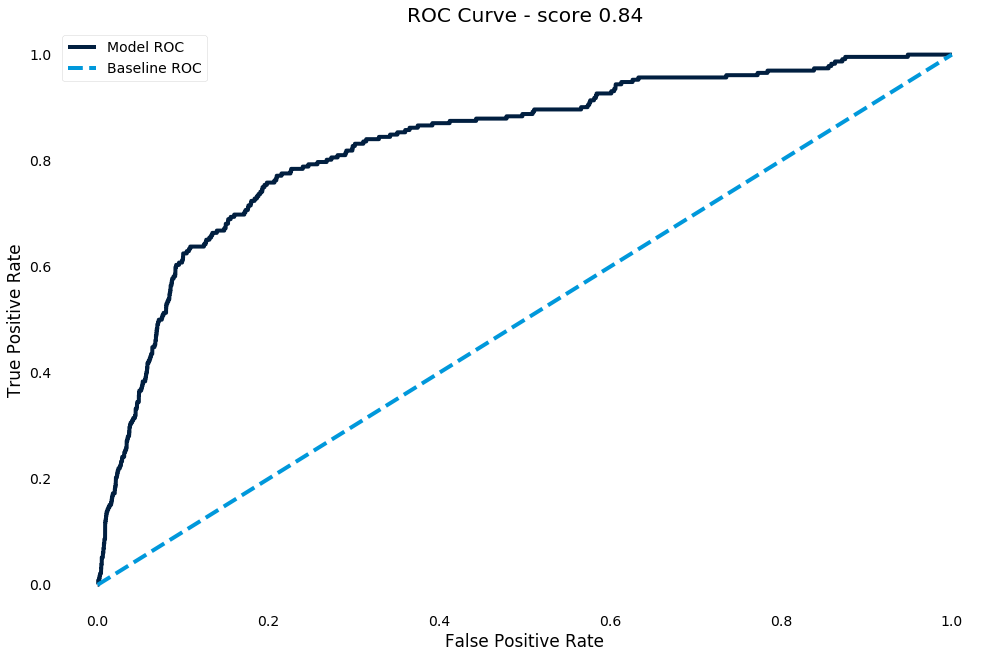

In [14]:
# %load snippets/roc_auc_curve.py
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(clf, test_x, test_y):
    pred_proba = clf.predict_proba(test_x)[:, 1] # Gives probability per label - we want the second class

    score = roc_auc_score(test_y, pred_proba)

    fpr, tpr, _ = roc_curve(test_y, pred_proba)

    plt.plot(fpr, tpr, label='Model ROC')
    plt.plot([0, 1], '--', label='Baseline ROC')
    plt.title(f'ROC Curve - score {score:.2f}');
    plt.ylabel('True Positive Rate');
    plt.xlabel('False Positive Rate');
    plt.legend(loc='best')
    
plot_roc_curve(clf, test_x, test_y)


In [16]:
# %load snippets/other_metrics.py
from sklearn.metrics import f1_score, precision_score, recall_score
pred = clf.predict(test_x)

precision = precision_score(test_y, pred) # Out of the predicted positives, how many were actually positive? How sure are we, when the model guesses positive?
recall = recall_score(test_y, pred) # Out of all the positives, how many did the model find? How sure are we that the model has found all the positive cases?
f1 = f1_score(test_y, pred) # The harmonic mean of precision and recall - Tries to summarise the precision-recall tradeoff into one number
print(f"F1 score: {f1}, Precision: {precision}, Recall: {recall}")


F1 score: 0.0, Precision: 0.0, Recall: 0.0


In [18]:
# %load snippets/all_the_models.py
# Import some more models to try
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from collections import defaultdict

# Instantiate all the models we want to try
models = [LogisticRegression(), GradientBoostingClassifier(), GaussianNB(), RandomForestClassifier(), KNeighborsClassifier(), DummyClassifier()]

results = {} # Setup a dictionary to save our results
for model in models: # Iterate over our models
    model_name = model.__class__.__name__ # Get the model name
    model.fit(train_x, train_y) # Fit the model
    pred_proba = model.predict_proba(test_x)[:, 1] # Get probability of class 1
    results[model_name] = roc_auc_score(test_y, pred_proba) # Calculate ROC AUC score
pd.Series(results).sort_values(ascending=False) # Convert to Series for sorting and prettyprinting


GradientBoostingClassifier    0.839124
LogisticRegression            0.835040
GaussianNB                    0.801960
KNeighborsClassifier          0.602850
RandomForestClassifier        0.590409
DummyClassifier               0.503019
dtype: float64

# Documentation
https://scikit-learn.org/stable/documentation.html

In [20]:
# %load snippets/different_parameters.py
gb = GradientBoostingClassifier(max_depth=5)

gb.fit(train_x, train_y)

pred_proba = gb.predict_proba(test_x)[:, 1]
roc_auc_score(test_y, pred_proba)


0.8340028183023873

In [22]:
# %load snippets/gridsearch.py
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [2, 4, 6, 8]} # Choose the parameters I want to tune and what values to try

grid = GridSearchCV(GradientBoostingClassifier(n_estimators=40), # setting n_estimators low to make it go a bit faster
                    param_grid=param_grid, # Our search space - 4 * 3 = 12 models
                    n_jobs=4, # Simple parallelization
                    verbose=1, # Get some text output
                    scoring='roc_auc') # What scoring function to use to compare models

grid.fit(train_x, train_y) # Train all combinations of parameters

print(f"Best score: {grid.best_score_:.3f}") # Get the score of the best-scoring model
print(f"Best params: {grid.best_params_}") # Get the params of the best-scoring model
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score') # Pretty print our results


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:   45.4s finished


Best score: 0.807
Best params: {'learning_rate': 0.1, 'max_depth': 2}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
8,1.157056,0.048080,0.020550,0.001024,0.1,2,"{'learning_rate': 0.1, 'max_depth': 2}",0.799570,0.822548,0.800343,0.807487,0.010654,1,0.824119,0.816398,0.827856,0.822791,0.004771
9,2.668008,0.062665,0.027420,0.002129,0.1,4,"{'learning_rate': 0.1, 'max_depth': 4}",0.802558,0.821707,0.793410,0.805892,0.011790,2,0.855404,0.851331,0.857350,0.854695,0.002508
5,2.510898,0.107214,0.028342,0.000518,0.01,4,"{'learning_rate': 0.01, 'max_depth': 4}",0.795200,0.816231,0.799470,0.803634,0.009077,3,0.826728,0.818273,0.829848,0.824950,0.004890
10,5.517577,0.228121,0.034821,0.000925,0.1,6,"{'learning_rate': 0.1, 'max_depth': 6}",0.796659,0.810475,0.782275,0.796470,0.011513,4,0.919203,0.911408,0.927084,0.919232,0.006400
6,5.275894,0.567713,0.037563,0.002478,0.01,6,"{'learning_rate': 0.01, 'max_depth': 6}",0.792252,0.808558,0.784022,0.794945,0.010196,5,0.852650,0.849475,0.850550,0.850892,0.001319
1,2.668410,0.082986,0.028057,0.001406,0.001,4,"{'learning_rate': 0.001, 'max_depth': 4}",0.787806,0.803835,0.789327,0.793656,0.007224,6,0.816729,0.813611,0.814576,0.814972,0.001303
2,5.194613,0.328088,0.037333,0.001300,0.001,6,"{'learning_rate': 0.001, 'max_depth': 6}",0.785414,0.795470,0.753281,0.778056,0.017992,7,0.844182,0.836887,0.838673,0.839914,0.003105
4,1.165278,0.051495,0.019737,0.001408,0.01,2,"{'learning_rate': 0.01, 'max_depth': 2}",0.783723,0.764581,0.783354,0.777219,0.008938,8,0.801725,0.762979,0.804168,0.789624,0.018867
11,8.090006,0.668874,0.029432,0.001482,0.1,8,"{'learning_rate': 0.1, 'max_depth': 8}",0.778332,0.780302,0.755294,0.771310,0.011353,9,0.980023,0.976623,0.983922,0.980189,0.002982
7,9.545651,1.269898,0.045907,0.002260,0.01,8,"{'learning_rate': 0.01, 'max_depth': 8}",0.763427,0.773586,0.736698,0.757905,0.015557,10,0.891506,0.904920,0.890658,0.895695,0.006532


In [24]:
# %load snippets/cv_demonstration.py
from sklearn.model_selection import KFold

cv = KFold(n_splits=3)

example_X = X[:21]
example_y = y[:21]

for i, (train_idx, test_idx) in enumerate(cv.split(example_X, example_y), start=1):
    print(f"Split nr: {i}")
    print('='*79)
    print("Train ids:")
    print(f"Number of rows: {len(train_idx)}")
    print(train_idx)
    print('-'*79)
    print(example_X.loc[train_idx, :'Age'])
    print()
    print("Test ids:")
    print(f"Number of rows: {len(test_idx)}")
    print(test_idx)
    print('-'*79)
    print(example_X.loc[test_idx, :'Age'])
    print()
    input()


Split nr: 1
Train ids:
Number of rows: 14
[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20]
-------------------------------------------------------------------------------
    Duration  Net Sales  Commision (in value)  Age
7         63     -108.9                 65.34   29
8         57      -19.8                 11.88   44
9        186      -99.0                 59.40   37
10        33      -26.0                  9.10  118
11         1      -18.0                  6.30   47
12        53     -130.0                 49.40   48
13         5      -39.6                 23.76   64
14        39      -25.0                  0.00   36
15         6      -19.8                 11.88   53
16        48      -79.2                 47.52   43
17        11      -29.7                 17.82   58
18         3      -18.0                  6.30   47
19        14      -69.3                 41.58   37
20       136     -108.9                 65.34   32

Test ids:
Number of rows: 7
[0 1 2 3 4 5 6]
------------------------

Split nr: 2
Train ids:
Number of rows: 14
[ 0  1  2  3  4  5  6 14 15 16 17 18 19 20]
-------------------------------------------------------------------------------
    Duration  Net Sales  Commision (in value)  Age
0        186      -29.0                  9.57   81
1        186      -29.0                  9.57   71
2         65      -49.5                 29.70   32
3         60      -39.6                 23.76   32
4         79      -19.8                 11.88   41
5         66     -121.0                 42.35   44
6         47      -39.6                 23.76   32
14        39      -25.0                  0.00   36
15         6      -19.8                 11.88   53
16        48      -79.2                 47.52   43
17        11      -29.7                 17.82   58
18         3      -18.0                  6.30   47
19        14      -69.3                 41.58   37
20       136     -108.9                 65.34   32

Test ids:
Number of rows: 7
[ 7  8  9 10 11 12 13]
-----------------

Split nr: 3
Train ids:
Number of rows: 14
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
-------------------------------------------------------------------------------
    Duration  Net Sales  Commision (in value)  Age
0        186      -29.0                  9.57   81
1        186      -29.0                  9.57   71
2         65      -49.5                 29.70   32
3         60      -39.6                 23.76   32
4         79      -19.8                 11.88   41
5         66     -121.0                 42.35   44
6         47      -39.6                 23.76   32
7         63     -108.9                 65.34   29
8         57      -19.8                 11.88   44
9        186      -99.0                 59.40   37
10        33      -26.0                  9.10  118
11         1      -18.0                  6.30   47
12        53     -130.0                 49.40   48
13         5      -39.6                 23.76   64

Test ids:
Number of rows: 7
[14 15 16 17 18 19 20]
-----------------

In [26]:
# %load snippets/cv_hard_way.py
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10) # Create a 10-fold StratifiedKFold cross validator
model = RandomForestClassifier(n_estimators=10, max_depth=5) # Create a RandomForest model with some hyperparameters set
scores = [] # Ready to accumulate scores
for train_idx, test_idx in cv.split(train_x, train_y): # cv.split gives us indexes to use per split
    train_split_X, train_split_y = train_x.values[train_idx], train_y[train_idx] # index into our train data
    test_split_X, test_split_y = train_x.values[test_idx], train_y[test_idx] # index into our test data
    
    model.fit(train_split_X, train_split_y) # Train the model on train data
    predict_proba = model.predict_proba(test_split_X)[:, 1] # Calculate ROC score on test data
    roc_score = roc_auc_score(test_split_y, predict_proba) 
    print(f"Score: {roc_score:.2f}")
    scores.append(roc_score) # Append scores to our list
print(f"Average: {np.mean(scores):.2f} Std: {np.std(scores):.2f}") # Print average and standard deviation of our scores


Score: 0.77
Score: 0.80
Score: 0.81
Score: 0.83
Score: 0.83
Score: 0.77
Score: 0.78
Score: 0.76
Score: 0.83
Score: 0.79
Average: 0.80 Std: 0.02


In [28]:
# %load snippets/cv_easy_way.py
from sklearn.model_selection import cross_val_score # The magic function
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=40) # Create our model with some parameters
cv = StratifiedKFold(n_splits=10) # Create a 10-fold StratifiedKFold cross validator

scores = cross_val_score(model, # The model we want to score
                         train_x, # Our data - remember our test_x and test_y are separate!
                         train_y, 
                         scoring='roc_auc', # Still want to score by roc_auc
                         cv=cv, # Our cross-validation object - could also pass 10 here
                         n_jobs=4, # Free parallellization! 
                         verbose=1)

print(f"Average: {np.mean(scores):.2f} Std: {np.std(scores):.2f}")


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Average: 0.81 Std: 0.03


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   11.9s finished


In [54]:
# %load snippets/feature_importance_gb
feature_importance = grid.best_estimator_.feature_importances_ # Grab feature importance from our best model
(pd.DataFrame(index=X.columns,
             data=feature_importance, 
             columns=['feature_importance'])
 .sort_values(by='feature_importance', ascending=False)
 .style.bar())


In [55]:
# %load snippets/feature_importance_lr
coefs = clf.coef_[0]
(pd.DataFrame(index=X.columns, data=coefs, columns=['feature_importance'])
 .assign(abs_coef=lambda x: x.abs())
 .sort_values(by='abs_coef', ascending=False)
 .drop(columns=['abs_coef'])
 .style.bar(align='zero')
)


# Conclusion
We have covered the following topics:
- Choosing the right metric for the job
- Train/test splitting
- Hyperparameters
- Grid searching
- Cross validation

There are still many aspects to Data Science and scikit-learn that I have not covered here, such as data pipelines, preprocessing and other cool features of sklearn. Hopefully it's enough to get you started, and help you not make simple, but devious mistakes!

It's never been easier to train a model, but that just makes it more dangerous if you're not careful!